<center><h1>A Machine Learning Voyage: Predicting Survival on the Titanic<h1></center>

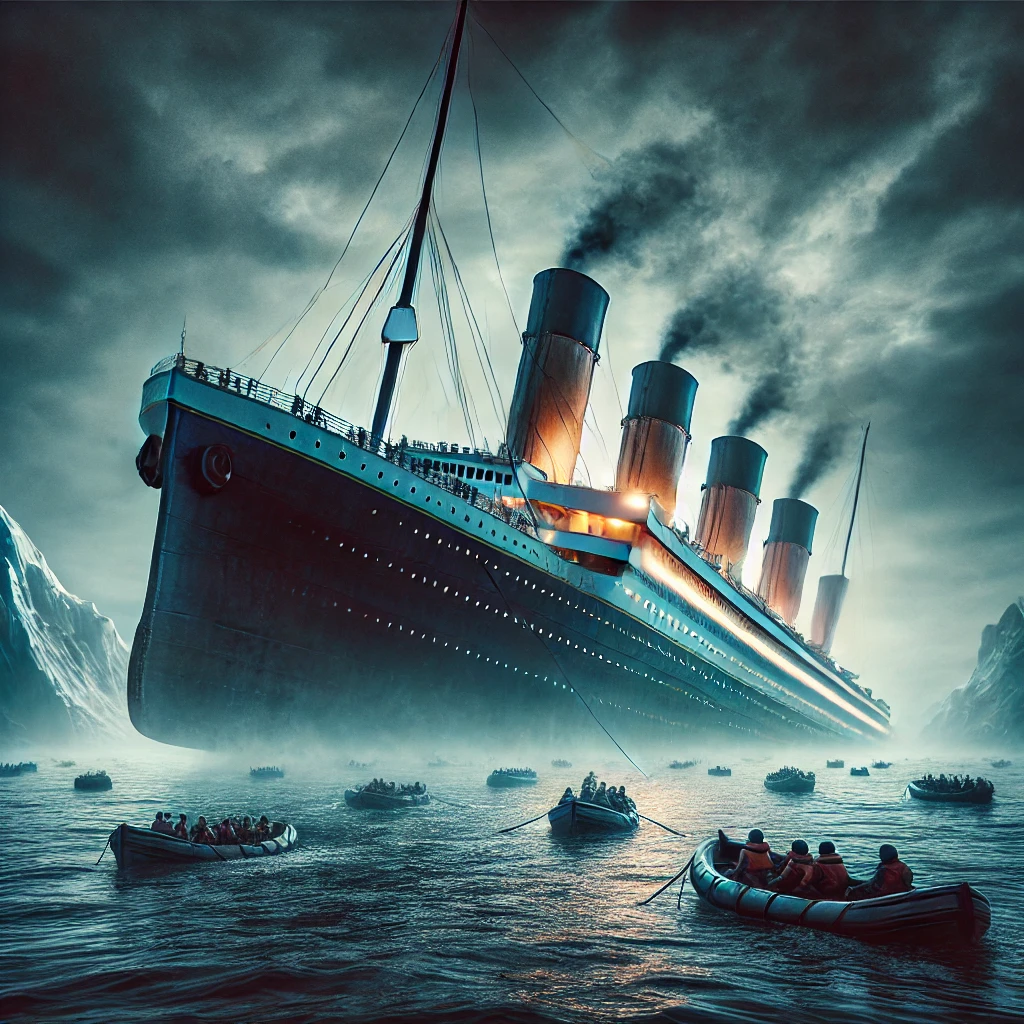

In [1]:
import os
from IPython.display import Image
PATH = "G://Titanic-Survival-Prediction-Using-ML//"
Image("Titanic_pic.jpg",width=400, height=500)

### **Introduction**
    The sinking of the RMS Titanic in 1912 remains a haunting reminder of the fragility of life. This project seeks to delve into the tragic events of that fateful night by employing machine learning techniques to predict passenger survival. By analyzing historical data, including age, gender, and social class, I aim to uncover the factors that may have influenced a passenger's fate. This analysis will not only provide valuable insights into the Titanic disaster but also demonstrate the power of machine learning in understanding historical events. 

**Importing Modules & Data**

In [2]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load CSV files** 

In [3]:
# Load dataset
train_df= pd.read_csv ('Titanic-Dataset.csv')

**Data Exploration**

In [4]:
# Basic info
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# statistical info
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Exploratory Data Analysis

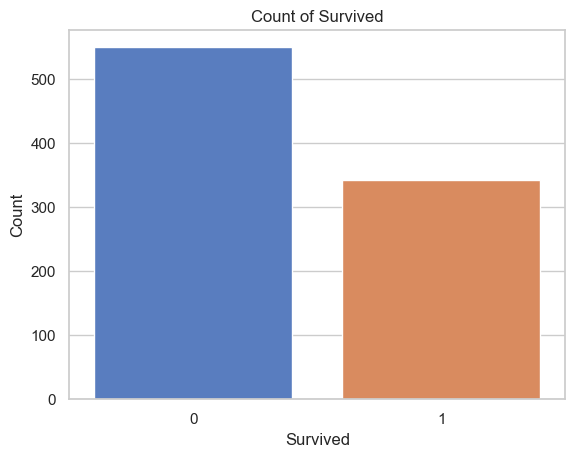

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

sns.countplot(data=train_df, x='Survived', palette='muted')

# Add titles and labels for clarity
plt.title('Count of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()


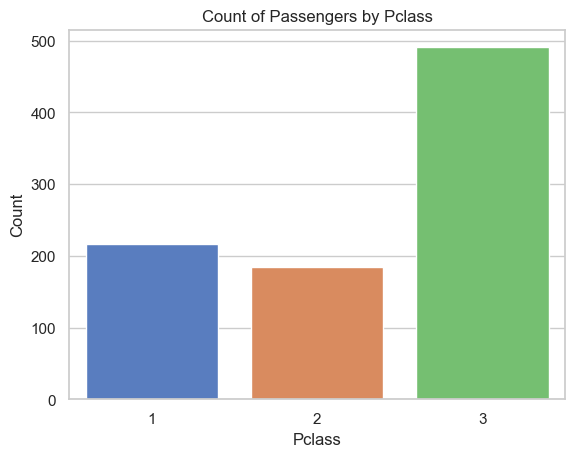

In [8]:
sns.set_theme(style="whitegrid")

sns.countplot(data=train_df, x='Pclass', palette='muted')

# Add titles and labels for clarity
plt.title('Count of Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.show()


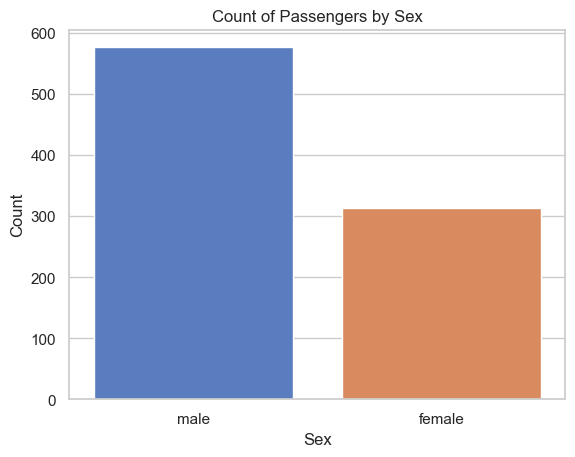

In [9]:
sns.set_theme(style="whitegrid")

sns.countplot(data=train_df, x='Sex', palette='muted')

# Add titles and labels for clarity
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()


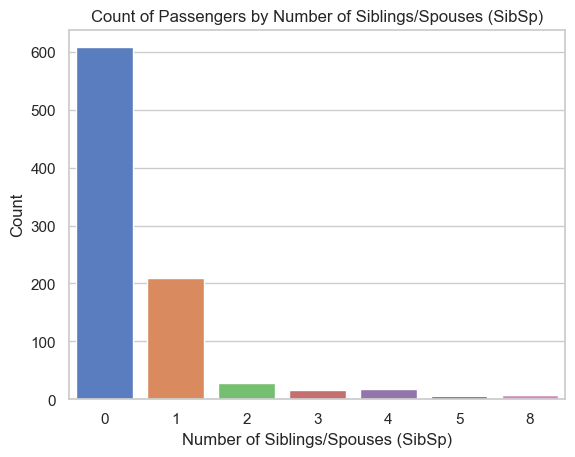

In [10]:
sns.set_theme(style="whitegrid")

sns.countplot(data=train_df, x='SibSp', palette='muted')

# Add titles and labels for clarity
plt.title('Count of Passengers by Number of Siblings/Spouses (SibSp)')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Count')

plt.show()


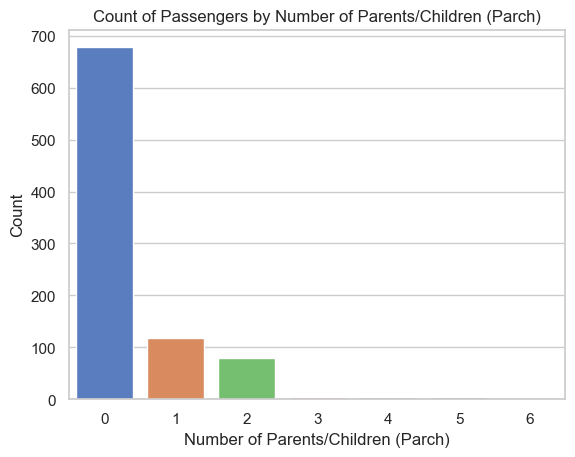

In [11]:
sns.set_theme(style="whitegrid")

sns.countplot(data=train_df, x='Parch', palette='muted')

# Add titles and labels for clarity
plt.title('Count of Passengers by Number of Parents/Children (Parch)')
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Count')

plt.show()


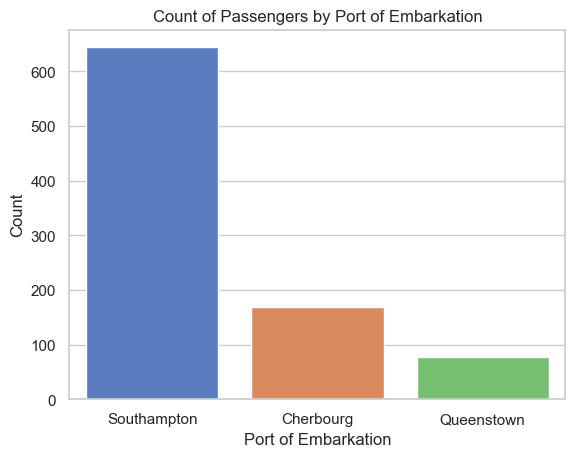

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=train_df, x='Embarked', palette='muted')

# Set the labels for the x-axis ticks
ax.set_xticklabels(['Southampton','Cherbourg', 'Queenstown'])

# Add titles and labels for clarity
plt.title('Count of Passengers by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')

plt.show()


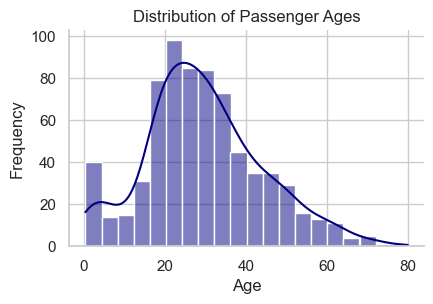

In [13]:
sns.set_theme(style="whitegrid")

sns.displot(train_df['Age'], kde=True, color='navy', height=3, aspect=1.5)

# Add titles and labels for clarity
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


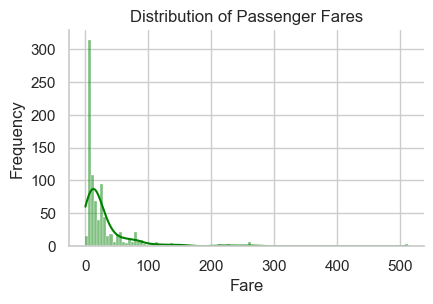

In [14]:
sns.set_theme(style="whitegrid")
sns.displot(train_df['Fare'], kde=True, color='green', height=3, aspect=1.5)

# Add titles and labels for clarity
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Show the plot
plt.show()


<Figure size 800x400 with 0 Axes>

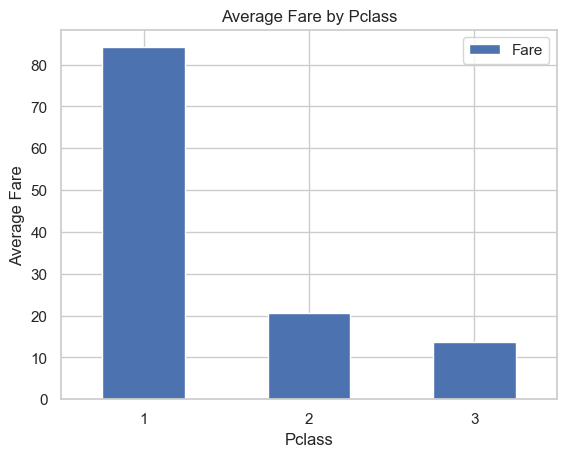

In [15]:
class_fare = train_df.pivot_table(index='Pclass', values='Fare')
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
class_fare.plot(kind='bar')
plt.title('Average Fare by Pclass')
plt.ylabel('Average Fare')
plt.xlabel('Pclass')
plt.xticks(rotation=0)
plt.show()

<Figure size 200x200 with 0 Axes>

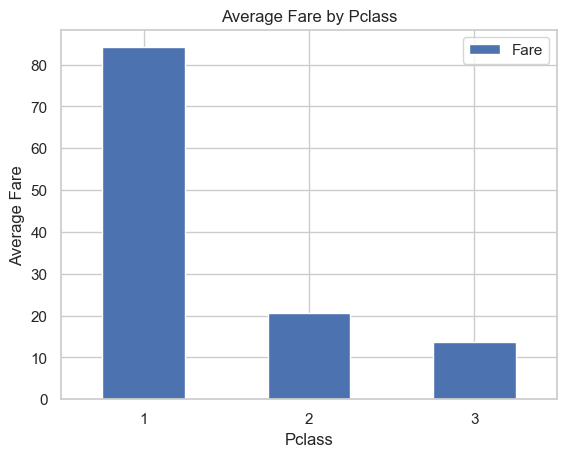

In [16]:
class_fare = train_df.pivot_table(index='Pclass', values='Fare')
plt.figure(figsize=(2, 2))
class_fare.plot(kind='bar')
plt.title('Average Fare by Pclass')
plt.ylabel('Average Fare')
plt.xlabel('Pclass')
plt.xticks(rotation=0)
plt.show()

<Figure size 200x200 with 0 Axes>

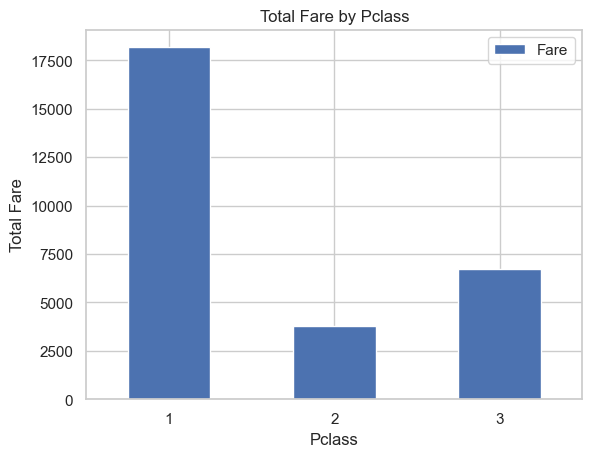

In [17]:
class_fare = train_df.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
plt.figure(figsize=(2, 2))
class_fare.plot(kind='bar')
plt.title('Total Fare by Pclass')
plt.ylabel('Total Fare')
plt.xlabel('Pclass')
plt.xticks(rotation=0)
plt.show()

Data Preprocessing 

In [18]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
train_df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
# null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# Drop the Cabin column
train_df.drop('Cabin', axis=1, inplace=True)

In [22]:
# fill missing values in Age column with the mean since it is a numerical column
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

# fill missing values in Fare column with the mean
train_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)

In [23]:
# fill missing values in Embarked column with the mode since it is a categorical column
train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

Log Transformation for uniform data distribution

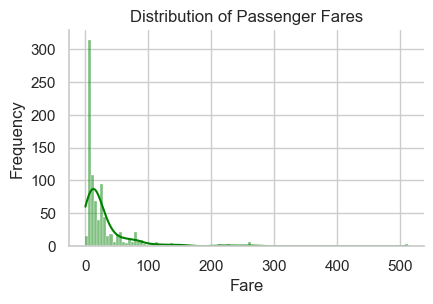

In [24]:
sns.set_theme(style="whitegrid")
sns.displot(train_df['Fare'], kde=True, color='green', height=3, aspect=1.5)

# Add titles and labels for clarity
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


In [25]:
# Log transformation of the Fare column to reduce skewness and make the distribution more symmetrical 
train_df['Fare'] = np.log(train_df['Fare'] + 1)

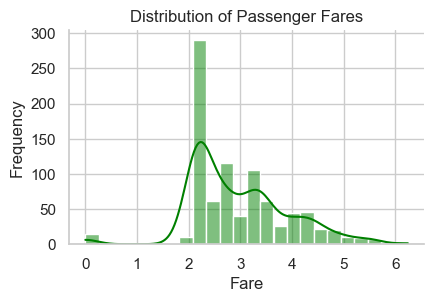

In [26]:
# Plot the distribution of the Fare column after log transformation 
sns.set_theme(style="whitegrid")
sns.displot(train_df['Fare'], kde=True, color='green', height=3, aspect=1.5)

# Add titles and labels for clarity
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


Correlation Matrix

<Axes: >

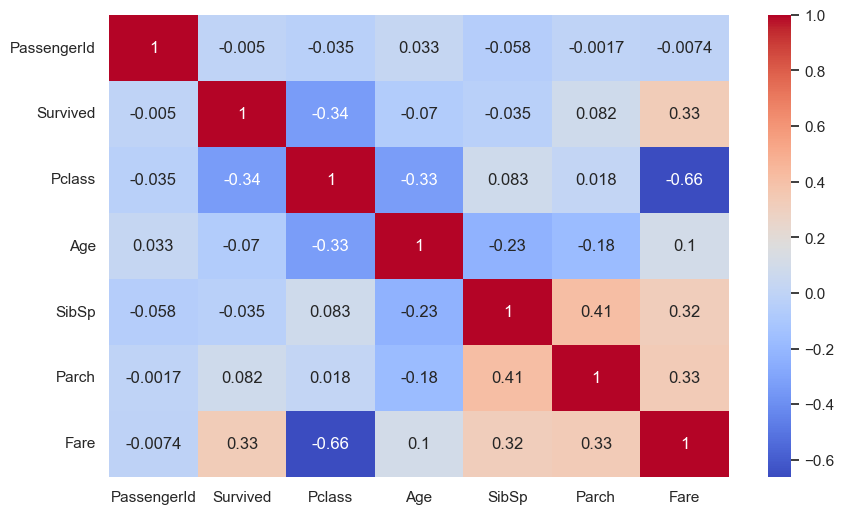

In [27]:
# Select only numeric columns for correlation matrix
numeric_cols = train_df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [28]:
# Drop the Name and Ticket columns
train_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [29]:
train_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,2.110213,S
1,2,1,1,female,38.0,1,0,4.280593,C


Label Encoding

In [30]:
# Convert categorical columns to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    train_df[col] = le.fit_transform(train_df[col])

train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2


Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

Separating Features and Target

In [32]:
X = train_df.drop(columns=['PassengerId', 'Survived'])
Y = train_df['Survived']

In [33]:
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2


Model Training

In [34]:
from sklearn.model_selection import train_test_split

# classify column
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    model.fit(X_train, Y_train)
    print('Accuracy:', model.score(X_test, Y_test) * 100)

    score = cross_val_score(model,X,Y,cv=5)

    print('Cross Validation Score:',np.mean(score)*100)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
classify(model, X, Y)


Accuracy: 80.71748878923766
Cross Validation Score: 78.33971502102818


In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, Y)

Accuracy: 73.09417040358744
Cross Validation Score: 76.77044755508129


In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, Y)

Accuracy: 78.02690582959642
Cross Validation Score: 81.14933149205952


In [38]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model, X, Y)

Accuracy: 79.37219730941703
Cross Validation Score: 79.46456594061891


In [65]:
# Upgrade xgboost and scikit-learn to the latest versions
%pip install --upgrade xgboost scikit-learn

from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='logloss')
classify(model, X_test, Y_test)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Accuracy: 76.78571428571429


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In the latest version of XGBoost (2.x), the `eval_metric` parameter is no longer supported directly in the `fit` method for `XGBClassifier`. 

Since omitting `eval_metric` doesn’t affect basic model training and accuracy, we can proceed without it unless early stopping or evaluation during training is required.

If early stopping or specific metrics are critical, we can implement it using `eval_set` and monitor the performance during training. Alternatively, downgrading XGBoost to version 1.7.6 will restore compatibility with the older approach.


Complete model training

In [53]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

Model Evalution
- Accuracy Score

In [54]:
# Accuracy on the training data
X_train_pred = model.predict(X_train)
print(X_train_pred)

[0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0
 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1
 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 

In [58]:
from sklearn.metrics import accuracy_score

# checking the accuracy on Y_train and X_train_pred
training_data_accuracy = accuracy_score(Y_train, X_train_pred)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7934131736526946


In [60]:
# Accuracy on the test data
X_test_pred = model.predict(X_test)
print(X_test_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0]


In [62]:
# checking the accuracy on Y_test and X_test_pred
test_data_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8071748878923767


Conclusion:

In this project, we developed a machine learning model to predict the survival of passengers on the Titanic. The model was trained on a dataset containing various features such as age, gender, passenger class, and fare. The accuracy of the model on the training data was approximately 79.34%, while the accuracy on the test data was approximately 80.72%.

These results indicate that the model performs reasonably well in predicting survival outcomes. However, there is still room for improvement. Further tuning of the model, inclusion of additional features, or utilizing more advanced algorithms could potentially enhance its performance.

Additionally, the model's predictions can be influenced by the quality and completeness of the data. Addressing any missing or imbalanced data could also contribute to better results.

Overall, this project demonstrates the potential of machine learning techniques in making predictions based on historical data and provides a foundation for further exploration and improvement.